In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df = pd.read_csv("C:/Users/TANVI/Desktop/Python Projects/sonar_data.csv",header=None)

The CSV files contain data regarding sonar signals bounced off a metal cylinder (mines - M) and a roughly cylindrical rock (rock - R) at various angles and under various conditions.

In [11]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [13]:
df.shape

(208, 61)

In [14]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [15]:
# Target Variable Distribution

In [16]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

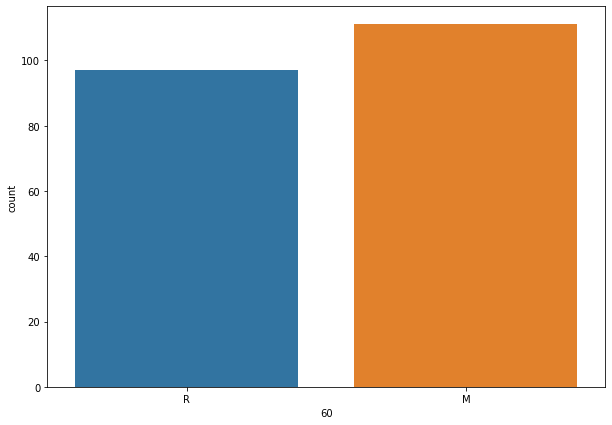

In [21]:
plt.figure(figsize=(10,7))
plot = sns.countplot(data=df,x=df[60])

In [22]:
# Fairly Balanced Dataset

In [24]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


# Model Development

In [25]:
X=df.drop(columns=60,axis=1)
y=df[60]

In [28]:
print(X.head(2))

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   

       9   ...      50      51      52      53      54      55     56      57  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.018  0.0084   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.014  0.0049   

       58      59  
0  0.0090  0.0032  
1  0.0052  0.0044  

[2 rows x 60 columns]


In [29]:
print(y.head(2))

0    R
1    R
Name: 60, dtype: object


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
decision tree 
svm
lr
gnb
rf
xgboost

## KNN

In [34]:
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [35]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

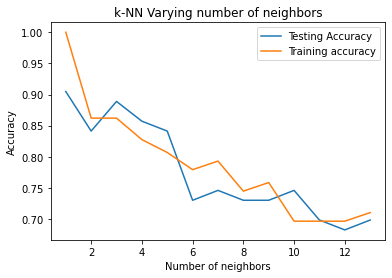

In [36]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

From the above plot, it can be seen that accuracy for both the training as well as the testing data decreases with the increasing number of neighbors, so k=2 would be a safe number to assume.

In [37]:
knn = KNeighborsClassifier(n_neighbors=2)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [61]:
# Accuracy of testing data

In [52]:
y_pred_knn = knn.predict(X_test)

In [55]:
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
acc_knn

0.8412698412698413

In [53]:
pd.crosstab(y_test, y_pred_knn, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,M,R,All
True,,,
M,34,1,35
R,9,19,28
All,43,20,63


In this model, mines were predicted as mines 34 times, 1 time mines were predicted as rocks, rocks were predicted as mines 9 times, and 19 times rocks were predicted as rocks.

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [60]:
# Accuracy of testing data

In [54]:
y_pred_lr = logisticRegr.predict(X_test)

In [56]:
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
acc_lr

0.8095238095238095

In [59]:
pd.crosstab(y_test, y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,M,R,All
True,,,
M,30,5,35
R,7,21,28
All,37,26,63


In this model, mines were predicted as mines 30 times, 5 times mines were predicted as rocks, rocks were predicted as mines 7 times, and 21 times rocks were predicted as rocks.

## KNN performed better

In [63]:
# Build predicitve system - to predict whether rock or mine 
# we will select some of the data from sonar_data at random to predict whether rock or mine 

# we will change input data  (list ) to numpy array for faster computation
input_data = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)

# changing data to numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the numpy array as we are predicting for 1 instance 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)

print(prediction)

if (prediction[0]=='R'):
    print("The object is the rock")
else:
    print("The object is a mine ")

['M']
The object is a mine 
